In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 2.2 Contour lines

In [34]:
x0 = [0,-1]
fx = f(x0)
grad = df(x0)
hess = ddf(x0)

In [66]:
def m(p1, p2, x0):
    p0 = np.array([p1,p2])
    fx = f(x0)
    grad = df(x0)
    hess = ddf(x0)
    return fx + grad.T * p0 + 1/2 * np.matmul(np.matmul(p0, hess),p0)

In [82]:
x1 = np.arange(-2, 2, 0.01)
x2 = np.arange(-2, 2, 0.01)
p1, p2 = np.meshgrid(x1, x2)

X = 0
Y = -1

fx = 10*(Y - X**2)**2 + (1 - X)**2
grad = (-40*(-X**2 + Y)*X - 2 + 2*X)*p1 + (-20*X**2 + 20*Y)*p2
hess = p1*((120*X**2 - 40**Y + 2)*p1 - 40*X*p2) + p2*(-40*p1*X + 20*p2)

F = fx + grad + hess

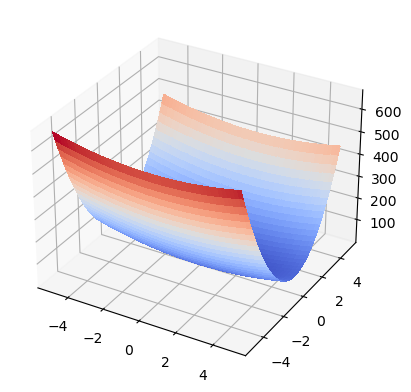

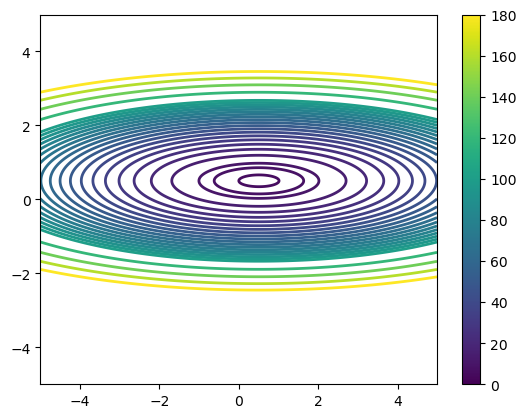

In [88]:
x1 = np.arange(-5, 5, 0.01)
x2 = np.arange(-5, 5, 0.01)
p1, p2 = np.meshgrid(x1, x2)

X = 0
Y = -1

fx = 10*(Y - X**2)**2 + (1 - X)**2
grad = (-40*(-X**2 + Y)*X - 2 + 2*X)*p1 + (-20*X**2 + 20*Y)*p2
hess = p1*((120*X**2 - 40**Y + 2)*p1 - 40*X*p2) + p2*(-40*p1*X + 20*p2)

F = fx + grad + hess
fig, ax=plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(p1, p2, F, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
plt.show()


fig, ax = plt.subplots()
v = np.concatenate((np.arange(0, 10, 2), np.arange(10, 100, 5), np.arange(100, 200, 20)), axis=None)
c = ax.contour(p1, p2, F, v, linewidths=2)
norm = matplotlib.colors.Normalize(vmin=c.cvalues.min(), vmax=c.cvalues.max())
sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=c.cmap)
fig.colorbar(sm, ax=ax)
plt.show()

# 2.4 Exact solver

In [141]:
def Myfun(x0):
    x = x0[0]
    y = x0[1]
    f = 10*(y - x**2)**2 + (1 - x)**2
    df = np.array([-40*(-x**3 + y*x) - 2 + 2*x, -20*x**2 + 20*y])
    d2f = np.matrix([[120*x**2 - 40*y + 2, -40*x], [-40*x, 20]])
    return f, df, d2f

In [145]:
d2f

matrix([[42,  0],
        [ 0, 20]])

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from scipy.linalg import cho_factor, cho_solve

# Initial x
x0 = np.array([0, -1])
f, df, d2f = Myfun(x0)

# Exact solver for subproblem
p_star = - np.linalg.solve(d2f, df)        # TODO - compute the full step -B\g.
norm_p_star = np.linalg.norm(p_star)

min_p = []   # It's a vector to save all p. 

for delta in np.arange(0.1, 2.1, 0.1):
    if norm_p_star < delta:
        p = p_star
        min_p.append(p)
    else:         # TODO  -- Second case    
        # ===============================================
        # TODO -- Easy case
        #  We use Newton's method to find the root of phi2
        
        lambd = 20  # The starting point for Newton, It need sufficiently large to ensure, B+\lambda I positive definite.
        Lambd = np.matrix([[lambd,0], [0,lambd]])
        R = cho_factor(d2f + Lambd)

        pl = -cho_solve(R, df)
        norm_pl = np.linalg.norm(pl)        
        ql = cho_solve(R, pl)
        norm_ql = np.linalg.norm(ql)


        phi2 = 1/delta-1/norm_pl
        
        # Loop in Newton's method
        while phi2 > 1e-8:
            lambda_new = lambd + (norm_pl/norm_ql)**2 * (norm_pl-delta)/delta
            Lambd = np.matrix([[lambda_new,0], [0,lambda_new]])

            R = cho_factor(d2f + Lambd)
            pl = -cho_solve(R, df)
            norm_pl = np.linalg.norm(pl)
            ql = cho_solve(R, pl)
            norm_ql = np.linalg.norm(ql)  

            lambd = lambda_new

            phi2 = 1/delta-1/norm_pl

        
        p = pl
        min_p.append(p)
        
        # =================================================
        # TODO -- Hard case
        # But do we have a hard case in this test problem? 
        # If not, you can ignore this part.



# Convert list to array for plotting
min_p = np.array(min_p).T

-312.01458864481816
-117.10960343346486
-52.141137442043
-19.656550836479497
-0.16197342552643823
